# Kaggle Dataset Link - 'https://www.kaggle.com/datasets/pkdarabi/cardetection'

In [1]:
# ==========================================================
# 1) INSTALL ULTRALYTICS
# ==========================================================
!pip install -q ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 23.0 MB/s eta 0:00:00


# **Import Modules**

In [2]:
import os
import random
import cv2
import matplotlib.pyplot as plt
import pandas as pd
import shutil
from ultralytics import YOLO

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


# **Load The Dataset**

In [3]:
TRAIN_IMG_DIR = "/kaggle/input/cardetection/car/train/images"

# **Data Preprocessing**

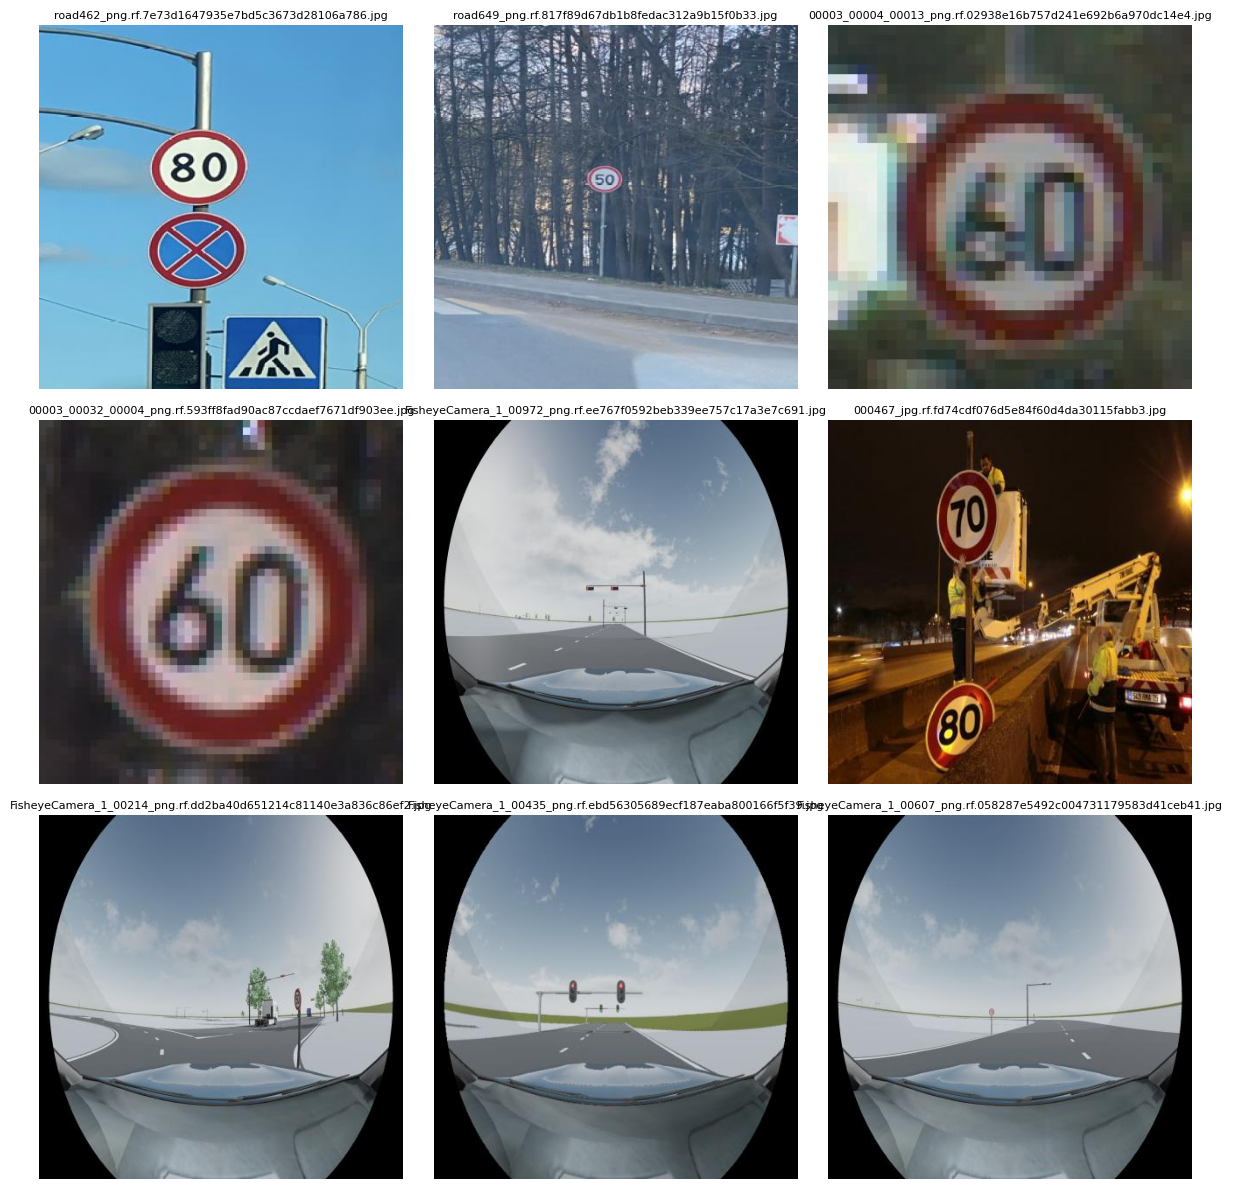

In [4]:
# ==========================================================
# 2) VISUALIZE RANDOM TRAIN IMAGES (BEFORE TRAINING)
# ==========================================================
TRAIN_IMG_DIR = "/kaggle/input/cardetection/car/train/images"

train_images = os.listdir(TRAIN_IMG_DIR)
sample_imgs = random.sample(train_images, 9)

plt.figure(figsize=(12, 12))

for i, img_name in enumerate(sample_imgs):
    img_path = os.path.join(TRAIN_IMG_DIR, img_name)

    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i+1)
    plt.imshow(img)
    plt.title(img_name, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()

# **Model Building**

In [5]:
# ==========================================================
# 3) Load YOLO MODEL
# ==========================================================
model = YOLO("yolov8n.pt")

In [6]:
# Train the model

model.train(
    data="/kaggle/input/cardetection/car/data.yaml",
    epochs=20,
    imgsz=640,
    batch=16,
    name="train",
    exist_ok=True
)


Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)
engine/trainer: agnostic_nms=False, amp=True, angle=1.0, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, compile=False, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/cardetection/car/data.yaml, degrees=0.0, deterministic=True, device=None, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, end2end=None, epochs=20, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=0.0, name=train, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, pe

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79800f4fcb00>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.0

In [7]:
# As runs folder contains two train use this code

# model.train(
#     data="/kaggle/input/cardetection/car/data.yaml",
#     epochs=50,
#     imgsz=640,
#     batch=16,
#     name="car_detection_run1"
# )

# Output: runs/detect/car_detection_run1/

# OR, 

# model.train(
#     data="/kaggle/input/cardetection/car/data.yaml",
#     epochs=50,
#     imgsz=640,
#     batch=16,
#     name="car_detection_run1",
#     exist_ok=True
# )


# model.train(
#     data="/kaggle/input/cardetection/car/data.yaml",
#     epochs=50,
#     imgsz=640,
#     batch=16,
#     name="train",
#     exist_ok=True
# )


# Output: runs/detect/train/


In [8]:
# Check results
results_csv = "/kaggle/working/runs/detect/train/results.csv"
df = pd.read_csv(results_csv)

In [9]:
df.head(5)

,epoch,time,train/box_loss,train/cls_loss,train/dfl_loss,metrics/precision(B),metrics/recall(B),metrics/mAP50(B),metrics/mAP50-95(B),val/box_loss,val/cls_loss,val/dfl_loss,lr/pg0,lr/pg1,lr/pg2
0,1,42.3961,0.85285,3.40772,1.17532,0.20359,0.52750,0.25176,0.19329,0.82669,2.96256,1.18500,0.000175,0.000175,0.000175
1,2,81.2411,0.77960,2.53763,1.10300,0.31073,0.57355,0.38347,0.30675,0.74519,1.81246,1.08740,0.000333,0.000333,0.000333
2,3,120.0400,0.76464,2.19165,1.08242,0.45251,0.47762,0.47564,0.38703,0.75276,1.54689,1.09104,0.000473,0.000473,0.000473
3,4,159.6520,0.73985,1.87901,1.06037,0.61953,0.63088,0.65202,0.51903,0.74947,1.24753,1.07380,0.000448,0.000448,0.000448
4,5,199.2730,0.70897,1.57322,1.04555,0.75694,0.67554,0.78220,0.65574,0.70596,0.99977,1.04153,0.000422,0.000422,0.000422


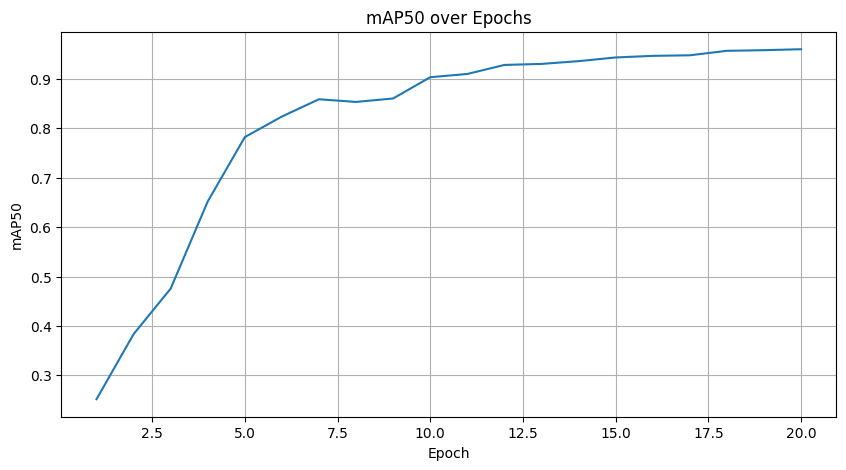

In [10]:
# ==========================================================
# 4) PLOT TRAINING GRAPH (mAP50 over Epochs)
# ==========================================================

plt.figure(figsize=(10, 5))
plt.plot(df["epoch"], df["metrics/mAP50(B)"])
plt.title("mAP50 over Epochs")
plt.xlabel("Epoch")
plt.ylabel("mAP50")
plt.grid(True)
plt.show()

# **Model Evaluation**

In [11]:
# ==========================================================
# 5) LOAD BEST MODEL
# ==========================================================
BEST_MODEL_PATH = "/kaggle/working/runs/detect/train/weights/best.pt"
best_model = YOLO(BEST_MODEL_PATH)

In [12]:
# ==========================================================
# 6) EVALUATE ON TEST DATASET (BEFORE PREDICTION)
# ==========================================================
best_model.val(
    data="/kaggle/input/cardetection/car/data.yaml",
    split="test"
)

Ultralytics 8.4.12 🚀 Python-3.12.12 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 14913MiB)
Model summary (fused): 73 layers, 3,008,573 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 6.1±1.4 MB/s, size: 20.8 KB)
val: Scanning /kaggle/input/cardetection/car/test/labels... 638 images, 1 backgrounds, 0 corrupt: 100% ━━━━━━━━━━━━ 638/638 326.8it/s 2.0s
WARNING ⚠️ val: Cache directory /kaggle/input/cardetection/car/test is not writable, cache not saved.
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100% ━━━━━━━━━━━━ 40/40 7.0it/s 5.7s
                   all        638        770        0.9      0.811      0.894      0.759
           Green Light         77        110      0.914      0.818      0.908      0.515
             Red Light         71         94      0.798      0.745       0.79      0.486
        Speed Limit 10          2          3          1          0      0.415      0.307
       Speed Limit 100         45  

ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x79800b71a750>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,   

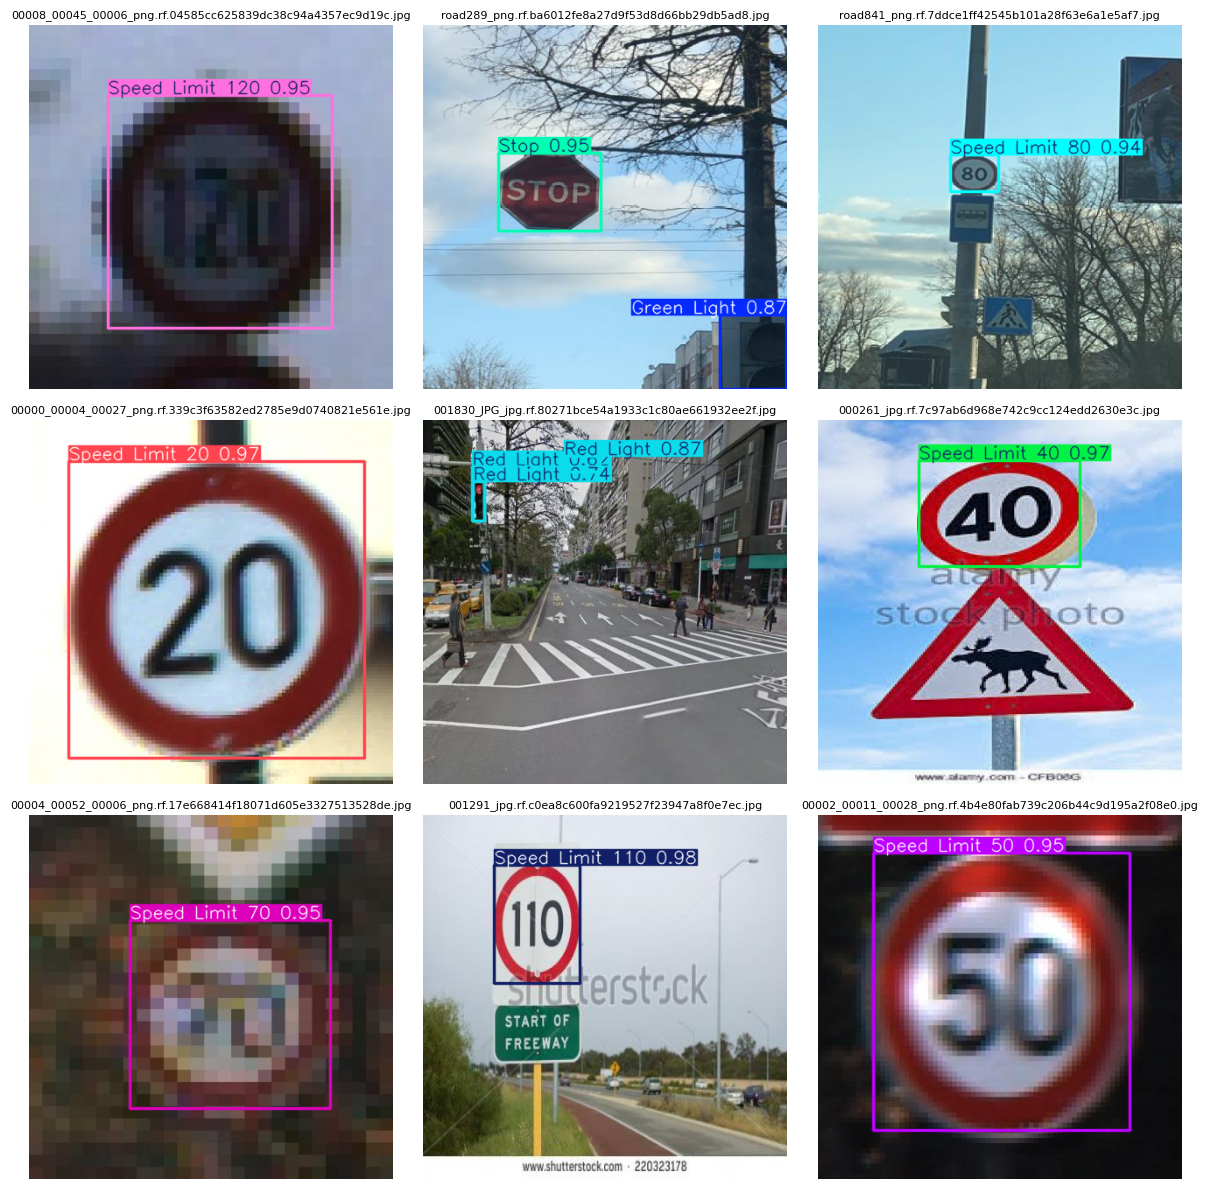

In [13]:
# ==========================================================
# 7) VISUALIZE RANDOM TEST PREDICTIONS (AFTER TRAINING)
# ==========================================================
TEST_IMG_DIR = "/kaggle/input/cardetection/car/test/images"

test_images = os.listdir(TEST_IMG_DIR)
sample_test_imgs = random.sample(test_images, 9)

plt.figure(figsize=(12, 12))

for i, img_name in enumerate(sample_test_imgs):
    img_path = os.path.join(TEST_IMG_DIR, img_name)

    results = best_model.predict(img_path, conf=0.4, verbose=False)[0]

    annotated_img = results.plot()
    annotated_img = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i+1)
    plt.imshow(annotated_img)
    plt.title(img_name, fontsize=8)
    plt.axis("off")

plt.tight_layout()
plt.show()

In [14]:
# ==========================================================
# 8) PYTHONIC COPY BEST MODEL TO OUTPUT FOLDER (FOR DOWNLOAD)
# ==========================================================
# src = "/kaggle/working/runs/detect/train2/weights/best.pt"
# dst = "/kaggle/working/best.pt"

# shutil.copy(src, dst)

# print("✅ best.pt copied to:", dst)
# print("📌 Now go to Kaggle Output tab and download best.pt")